In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
premium = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/PREMIUM.csv").dropna()
sector_return = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/SECTOR_RETURN.csv").dropna()
market_return = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/시장수익률.csv").dropna()

display(premium, sector_return,market_return) 

,Code,HML,CMA,UMD,SMB,Rm-Rf
0,2000-01-05,-0.041391,-0.010371,-0.037805,0.028943,-0.056097
1,2000-01-06,-0.019918,0.009651,-0.027487,0.053325,-0.033296
2,2000-01-07,0.010137,0.006339,0.007525,-0.013642,-0.026680
3,2000-01-10,-0.004110,-0.013460,0.007272,-0.011671,0.035532
4,2000-01-11,-0.009221,-0.004197,0.012245,0.006785,0.004786
...,...,...,...,...,...,...
5672,2022-12-23,0.008130,0.000817,0.000673,-0.009641,-0.020703
5673,2022-12-26,-0.002100,0.005953,0.001946,-0.007360,0.001930
5674,2022-12-27,-0.003220,0.001029,-0.000858,0.000903,0.007762
5675,2022-12-28,-0.013663,-0.016116,-0.007775,0.012979,-0.021637


,Name,에너지,소재,산업재,경기관련소비재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
0,2000-01-05,-0.050102,0.015098,-0.008902,-0.012002,-0.035202,0.022198,-0.018202,-0.064602,-0.113902,-0.050102
1,2000-01-06,-0.044302,-0.039502,-0.051402,-0.046202,-0.042302,-0.077302,-0.066702,-0.026502,-0.021502,0.023298
2,2000-01-07,-0.019702,0.019298,-0.004602,-0.011602,-0.009002,0.019598,0.020498,-0.034902,-0.079602,0.044098
3,2000-01-10,0.033398,0.005798,-0.002102,0.008998,0.007798,-0.006402,0.053498,0.019798,0.040798,0.008098
4,2000-01-11,0.007798,0.016598,-0.000702,0.023498,0.032098,0.022598,-0.006502,0.027398,-0.018002,-0.019902
...,...,...,...,...,...,...,...,...,...,...,...
5672,2022-12-23,-0.021010,-0.021710,-0.018910,-0.013010,-0.008810,-0.034410,-0.013110,-0.021210,-0.025710,-0.003410
5673,2022-12-26,-0.000810,0.009290,0.000290,0.003090,-0.004610,0.010090,-0.002810,-0.001910,0.002390,-0.002210
5674,2022-12-27,0.002091,0.009891,0.012191,0.014991,0.004591,0.009091,0.007791,0.004191,0.009391,-0.007409
5675,2022-12-28,-0.031609,-0.023909,-0.013409,-0.015609,-0.019209,-0.014009,-0.044309,-0.024509,-0.016009,0.027891


,Code,코스피,코스닥
0,2000-01-05,0.931300,0.988500
1,2000-01-06,0.907179,0.930475
2,2000-01-07,0.895749,0.855851
3,2000-01-10,0.932206,0.868689
4,2000-01-11,0.926613,0.911168
...,...,...,...
5672,2022-12-23,2.191236,0.260398
5673,2022-12-26,2.194523,0.261700
5674,2022-12-27,2.209446,0.265286
5675,2022-12-28,2.159954,0.260829


In [16]:
premium['Code'] = pd.to_datetime(premium['Code'])
train_premium = premium[premium['Code']<'2017-01-01']
test_premium = premium[premium['Code']>='2017-01-01']
sector_return['Name'] = pd.to_datetime(sector_return['Name'])
train_sector_return = sector_return[sector_return['Name']<'2017-01-01']
test_sector_return = sector_return[sector_return['Name']>='2017-01-01']

In [20]:
train_sector_return[sector]

0      -0.050102
1       0.023298
2       0.044098
3       0.008098
4      -0.019902
          ...   
4197    0.011158
4198    0.006558
4199    0.010558
4200   -0.032442
4201   -0.016942
Name: 유틸리티, Length: 4202, dtype: float64

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

predictions = {}

start_date = pd.Timestamp(year=2017, month=1, day=1)
end_date = pd.Timestamp(year=2022, month=12, day=31)

for date in pd.date_range(start=start_date, end=end_date, freq='Q'):
    quarter_start = date - pd.offsets.MonthEnd(3)
    quarter_end = date
    for sector in sector_return.columns[1:]: 
        train_premium = premium[premium['Code']<quarter_start]
        train_sector_return = sector_return[sector_return['Name']<quarter_start]
        test_premium = premium[(premium['Code'] >= quarter_start) & (premium['Code'] < quarter_end)]
        test_sector_return = sector_return[(sector_return['Name'] >= quarter_start) & (sector_return['Name'] < quarter_end)]
        
        X_train =train_premium.iloc[:,1:]
        y_train =train_sector_return[sector]
        X_test = test_premium.iloc[:,1:]
        y_test = test_sector_return[sector]

        svr = SVR(kernel='linear'   , C=1, epsilon=0.01)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        predict_df = pd.DataFrame({'actual': y_test, 'predict': y_pred})

        for date, pred in zip(test_premium['Code'], y_pred):
            if date not in predictions:
                predictions[date] = {}
            predictions[date][sector] = pred
result_df = pd.DataFrame.from_dict(predictions, orient='index').sort_index()
result_df


,에너지,소재,산업재,경기관련소비재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
2017-01-02,-0.001021,0.000341,0.000773,0.000909,0.000539,0.004059,-0.001306,-0.000611,-0.000899,0.000275
2017-01-03,0.007215,0.008228,0.009217,0.007989,0.004751,0.008985,0.007994,0.009377,0.004834,0.005046
2017-01-04,0.000235,0.000704,0.001523,0.002020,0.000894,0.005825,0.000322,0.002346,-0.001363,0.000009
2017-01-05,-0.001548,-0.001507,-0.001203,-0.000486,-0.000769,0.001978,-0.000921,-0.000142,-0.002740,0.000330
2017-01-06,0.003163,0.003483,0.003195,0.003054,0.001529,0.001877,0.003467,0.004193,0.001383,0.001632
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.017499,-0.018436,-0.022154,-0.018849,-0.011852,-0.025137,-0.015816,-0.023115,-0.013279,-0.007135
2022-12-26,0.002563,0.002370,0.000934,0.001586,0.000538,-0.002743,0.003096,0.003555,0.001112,-0.000311
2022-12-27,0.006912,0.007729,0.008172,0.007339,0.004559,0.008193,0.007047,0.008696,0.004692,0.003737
2022-12-28,-0.022056,-0.022885,-0.022996,-0.019243,-0.011918,-0.008089,-0.025379,-0.022506,-0.017587,-0.014406


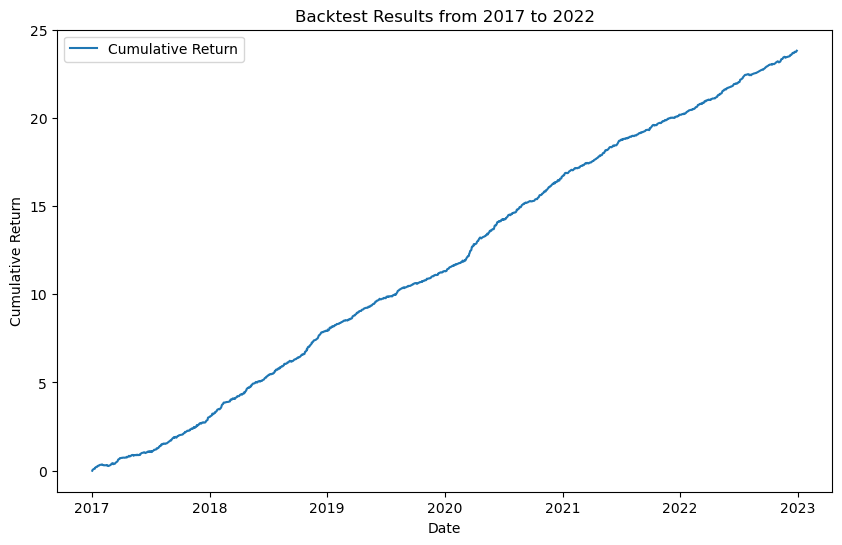

,Top Sectors,Bottom Sectors,Buy Return,Sell Return,Net Return
2017-01-02,"[건강관리, 경기관련소비재]","[금융, 에너지]",-0.010383,-0.003583,-0.0068
2017-01-03,"[IT, 산업재]","[필수소비재, 커뮤니케이션서비스]",0.019717,-0.027383,0.0471
2017-01-04,"[건강관리, IT]","[커뮤니케이션서비스, 유틸리티]",0.010917,-0.003883,0.0148
2017-01-05,"[건강관리, 유틸리티]","[커뮤니케이션서비스, 에너지]",0.015217,0.004917,0.0103
2017-01-06,"[IT, 소재]","[커뮤니케이션서비스, 필수소비재]",0.014018,-0.004882,0.0189
...,...,...,...,...,...
2022-12-23,"[유틸리티, 필수소비재]","[건강관리, IT]",-0.012221,-0.055621,0.0434
2022-12-26,"[IT, 금융]","[건강관리, 유틸리티]",-0.004721,0.007879,-0.0126
2022-12-27,"[IT, 건강관리]","[유틸리티, 필수소비재]",0.013282,-0.002818,0.0161
2022-12-28,"[건강관리, 필수소비재]","[금융, 산업재]",-0.033218,-0.057718,0.0245


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 날짜별로 상위 2개 섹터 매수 및 하위 2개 섹터 매도
backtest_results = []
for date, predictions in result_df.iterrows():
    top_sectors = predictions.nlargest(2).index.tolist()
    bottom_sectors = predictions.nsmallest(2).index.tolist()

    actual_returns = sector_return.loc[sector_return['Name'] == date, top_sectors + bottom_sectors]

    buy_returns = actual_returns[top_sectors].sum(axis=1).iloc[0]
    sell_returns = actual_returns[bottom_sectors].sum(axis=1).iloc[0]
    net_return = buy_returns - sell_returns

    # 날짜별 결과 저장
    backtest_results.append({
        'Top Sectors': top_sectors, 
        'Bottom Sectors': bottom_sectors, 
        'Buy Return': buy_returns, 
        'Sell Return': sell_returns, 
        'Net Return': net_return
    })

# 백테스트 결과 데이터프레임 생성
backtest_df = pd.DataFrame(backtest_results, index=result_df.index)

# 백테스트 결과 그래프로 표시
plt.figure(figsize=(10, 6))
plt.plot(backtest_df.index, backtest_df['Net Return'].cumsum(), label='Cumulative Return')
plt.title('Backtest Results from 2017 to 2022')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# backtest_df 확인
backtest_df


In [51]:
backtest_df.to_excel('svrbactest결과.xlsx')

여기까지 SVR 이제 randomforest 돌릴게여

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

predictions = {}

start_date = pd.Timestamp(year=2017, month=1, day=1)
end_date = pd.Timestamp(year=2022, month=12, day=31)

for date in tqdm(pd.date_range(start=start_date, end=end_date, freq='Q')):
    quarter_start = date - pd.offsets.MonthEnd(3)
    quarter_end = date
    for sector in sector_return.columns[1:]: 
        train_premium = premium[premium['Code']<quarter_start]
        train_sector_return = sector_return[sector_return['Name']<quarter_start]
        test_premium = premium[(premium['Code'] >= quarter_start) & (premium['Code'] < quarter_end)]
        test_sector_return = sector_return[(sector_return['Name'] >= quarter_start) & (sector_return['Name'] < quarter_end)]
        
        X_train = train_premium.iloc[:,1:]
        y_train = train_sector_return[sector]
        X_test = test_premium.iloc[:,1:]
        y_test = test_sector_return[sector]

        # RandomForestRegressor 사용
        rfr = RandomForestRegressor(n_estimators=100, random_state=0)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_test)
        predict_df = pd.DataFrame({'actual': y_test, 'predict': y_pred})

        for date, pred in zip(test_premium['Code'], y_pred):
            if date not in predictions:
                predictions[date] = {}
            predictions[date][sector] = pred

result_df = pd.DataFrame.from_dict(predictions, orient='index').sort_index()
result_df


  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [33:33<00:00, 83.88s/it]


,에너지,소재,산업재,경기관련소비재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
2017-01-02,-0.002170,-0.001822,-0.001032,0.001295,0.004059,0.006030,-0.003213,-0.000420,0.003756,0.002430
2017-01-03,0.010976,0.005598,0.010985,0.009747,0.005510,0.008531,0.009194,0.010071,0.001142,0.004256
2017-01-04,0.004373,0.001909,0.004851,0.001922,0.001880,0.015985,0.002136,-0.002649,0.000235,-0.001261
2017-01-05,-0.007437,-0.005035,-0.000531,-0.001699,0.001841,0.002525,0.000693,-0.004483,0.001717,-0.000775
2017-01-06,0.001848,0.002861,0.005790,0.004245,0.001992,0.003841,0.003616,0.003742,0.000634,0.001906
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.011539,-0.020780,-0.021758,-0.019303,-0.015036,-0.035780,-0.018685,-0.021618,-0.015513,-0.009459
2022-12-26,0.005776,0.002727,0.001072,-0.001508,0.000131,-0.004551,-0.000994,0.004403,0.002351,0.001371
2022-12-27,0.007596,0.005416,0.009873,0.005366,0.006252,0.005220,0.010221,0.011478,0.003341,0.002407
2022-12-28,-0.023832,-0.017739,-0.023232,-0.018455,-0.010735,-0.008668,-0.026042,-0.027731,-0.017116,-0.010775


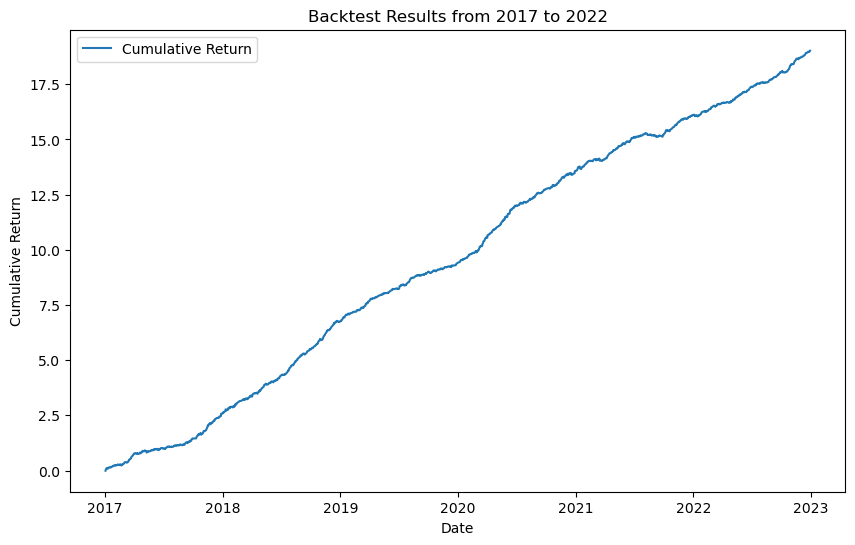

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 예측된 수익률 데이터프레임 (result_df)과 실제 수익률 데이터프레임 (sector_return)를 가정합니다.

# 각 날짜별로 상위 2개 섹터 매수 및 하위 2개 섹터 매도
backtest_results = []
for date, predictions in result_df.iterrows():
    top_sectors = predictions.nlargest(2).index.tolist()
    bottom_sectors = predictions.nsmallest(2).index.tolist()

    actual_returns = sector_return.loc[sector_return['Name'] == date, top_sectors + bottom_sectors]

    buy_returns = actual_returns[top_sectors].sum(axis=1)
    sell_returns = actual_returns[bottom_sectors].sum(axis=1)
    net_return = buy_returns - sell_returns

    backtest_results.append(net_return.iloc[0]) 

backtest_df = pd.DataFrame(backtest_results, index=result_df.index, columns=['Net Return'])

# 백테스트 결과 그래프로 표시
plt.figure(figsize=(10, 6))
plt.plot(backtest_df.index, backtest_df['Net Return'].cumsum(), label='Cumulative Return')
plt.title('Backtest Results from 2017 to 2022')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
